# Appalachian Trail Analysis & Visualization

An interactive analysis of the Appalachian Trail - exploring 2,190 miles of trail from Georgia to Maine.

## Overview

The Appalachian Trail (AT) is one of the longest continuously marked footpaths in the world. This notebook provides:

- **Statistical Analysis**: Distance, elevation, and difficulty metrics
- **State-by-State Breakdown**: Detailed statistics for each of the 14 states
- **Interactive Visualizations**: Explore elevation profiles and maps
- **Difficulty Analysis**: Understanding the challenging sections

---


## Setup & Imports


In [12]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.insert(0, './src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_or_generate_data, AppalachianTrailData
from analysis import TrailAnalyzer
from visualization import TrailVisualizer

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✓ Imports complete")


✓ Imports complete


## 1. Load Trail Data


In [13]:
# Load or generate trail data
df, stats = load_or_generate_data('./data/trail_data.csv')

print(f"Loaded {len(df):,} data points")
print(f"\nDataFrame shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

# Display first few rows
df.head(10)


Loaded 19,560 data points

DataFrame shape: (19560, 6)

Columns: ['point_id', 'latitude', 'longitude', 'elevation_ft', 'distance_miles', 'state']


,point_id,latitude,longitude,elevation_ft,distance_miles,state
0,0,34.628027,-84.187432,3795.884701,0.0,Georgia
1,1,34.629003,-84.202235,3791.055301,0.1,Georgia
2,2,34.630778,-84.175789,3797.315228,0.2,Georgia
3,3,34.617059,-84.207191,3821.714640,0.3,Georgia
4,4,34.630602,-84.206715,3834.013993,0.4,Georgia
5,5,34.649675,-84.176888,3837.859390,0.5,Georgia
6,6,34.620680,-84.184771,3817.462111,0.6,Georgia
7,7,34.641410,-84.191355,3830.425546,0.7,Georgia
8,8,34.608701,-84.181188,3863.332399,0.8,Georgia
9,9,34.627844,-84.197028,3859.588480,0.9,Georgia


In [14]:
# Basic statistics
df.describe()


,point_id,latitude,longitude,elevation_ft,distance_miles
count,19560.000000,19560.000000,19560.000000,19560.000000,19560.000000
mean,9779.500000,40.265198,-76.557981,1963.013472,977.950000
std,5646.629968,3.255623,4.408917,1261.325862,564.662997
min,0.000000,34.608701,-84.214907,0.000000,0.000000
25%,4889.750000,37.444712,-80.376023,981.015607,488.975000
50%,9779.500000,40.265946,-76.556572,1829.858621,977.950000
75%,14669.250000,43.086233,-72.738833,3090.538840,1466.925000
max,19559.000000,45.913699,-68.911490,4854.285534,1955.900000


## 2. Statistical Analysis


In [15]:
# Create analyzer
analyzer = TrailAnalyzer(df)

# Get summary statistics
summary = analyzer.get_summary_statistics()

print("=" * 70)
print("APPALACHIAN TRAIL SUMMARY STATISTICS")
print("=" * 70)
print(f"\n📏 Distance")
print(f"  Total Distance: {summary['total_distance_miles']:.1f} miles")

print(f"\n⛰️  Elevation")
print(f"  Total Gain: {summary['total_elevation_gain_ft']:,.0f} feet")
print(f"  Total Loss: {summary['total_elevation_loss_ft']:,.0f} feet")
print(f"  Range: {summary['min_elevation_ft']:.0f} - {summary['max_elevation_ft']:.0f} feet")
print(f"  Average: {summary['avg_elevation_ft']:.0f} feet")

print(f"\n📊 Trail Characteristics")
print(f"  Number of States: {summary['num_states']}")
print(f"  Significant Peaks: {summary['num_significant_peaks']}")
print(f"  Significant Valleys: {summary['num_significant_valleys']}")
print(f"  Average Grade: {summary['avg_grade_percent']:.2f}%")
print(f"  Maximum Grade: {summary['max_grade_percent']:.2f}%")

time_est = summary['hiking_time_estimates']
print(f"\n⏱️  Hiking Time Estimates")
print(f"  Total Time: {time_est['total_hours']:,.0f} hours")
print(f"  Days (8hr/day): {time_est['hiking_days_8hr']:.0f} days")
print(f"  Days (10hr/day): {time_est['hiking_days_10hr']:.0f} days")
print(f"  Typical Thru-hike: {time_est['typical_thru_hike_months']:.1f} months")


APPALACHIAN TRAIL SUMMARY STATISTICS

📏 Distance
  Total Distance: 1955.9 miles

⛰️  Elevation
  Total Gain: 216,693 feet
  Total Loss: 219,490 feet
  Range: 0 - 4854 feet
  Average: 1963 feet

📊 Trail Characteristics
  Number of States: 14
  Significant Peaks: 38
  Significant Valleys: 60
  Average Grade: 4.22%
  Maximum Grade: 251.59%

⏱️  Hiking Time Estimates
  Total Time: 978 hours
  Days (8hr/day): 122 days
  Days (10hr/day): 98 days
  Typical Thru-hike: 4.1 months


## 3. State-by-State Analysis


In [16]:
# Get state statistics
state_stats = analyzer.analyze_by_state()

print("\n📍 STATE-BY-STATE BREAKDOWN\n")
state_stats



📍 STATE-BY-STATE BREAKDOWN



,State,Miles,Min Elevation,Max Elevation,Elev Range,Total Gain,Total Loss,Avg Elevation,Avg Grade %,Max Grade %
0,Georgia,74.9,3451.20,4103.62,652.42,8341.51,8343.75,3840.95,4.21,15.85
1,North Carolina,95.6,2170.42,4847.60,2677.18,12019.50,12229.70,3772.53,4.80,55.48
2,Tennessee,71.5,2160.45,4854.29,2693.83,10199.73,10217.74,3771.83,5.40,20.26
3,Virginia,544.5,1102.92,3890.82,2787.90,62820.40,63863.44,2779.68,4.41,201.19
4,West Virginia,3.9,1063.91,1333.68,269.77,618.32,1861.70,1230.20,11.74,251.59
5,Maryland,40.8,599.45,1425.94,826.49,5025.12,5291.25,1078.33,4.78,53.96
6,Pennsylvania,229.5,231.34,1389.53,1158.19,25699.11,25887.35,911.17,4.26,35.58
7,New Jersey,72.1,0.00,964.50,964.50,7708.27,8128.97,523.91,4.15,76.79
8,New York,88.3,0.00,872.19,872.19,9354.69,9303.31,492.37,4.00,17.35
9,Connecticut,51.5,0.00,1310.13,1310.13,5576.29,5471.77,691.36,4.06,22.14


## 4. Elevation Profile Visualization


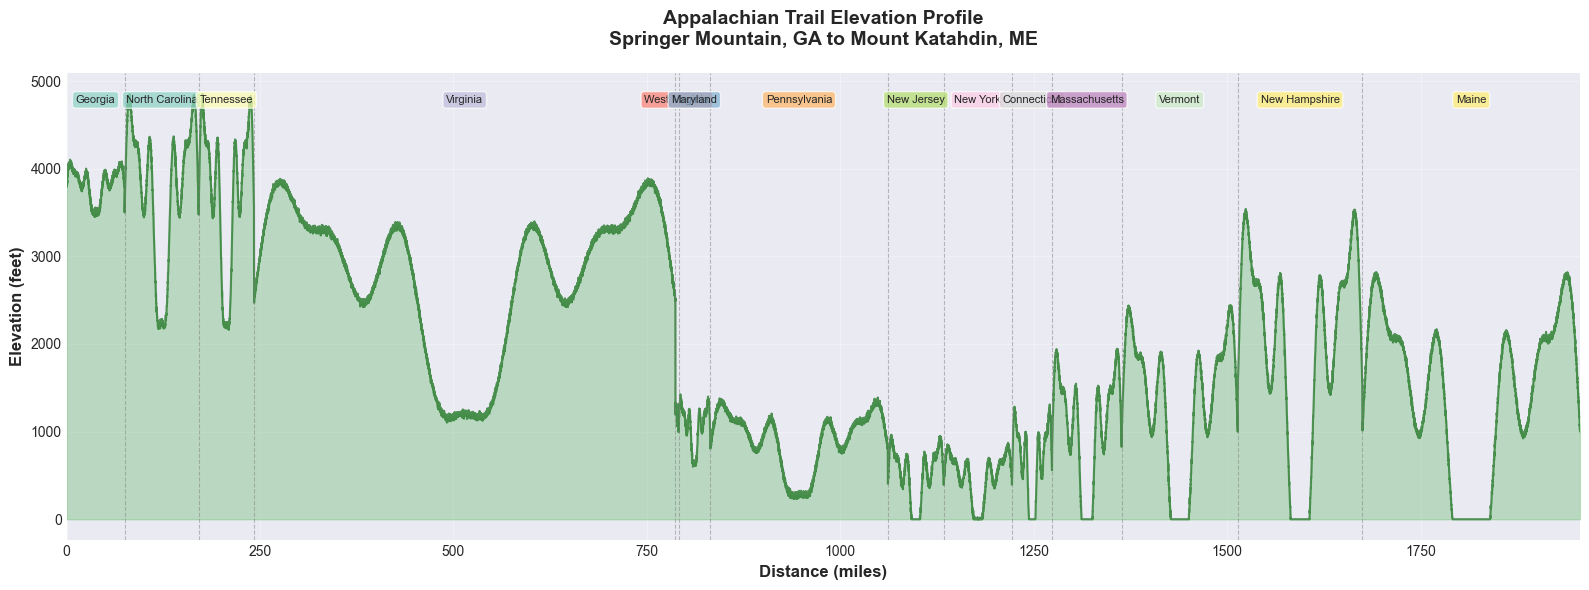

In [17]:
# Create visualizer
visualizer = TrailVisualizer(df, './outputs')

# Plot elevation profile
visualizer.plot_elevation_profile(highlight_states=True, save=False)


## 5. State Statistics Visualization


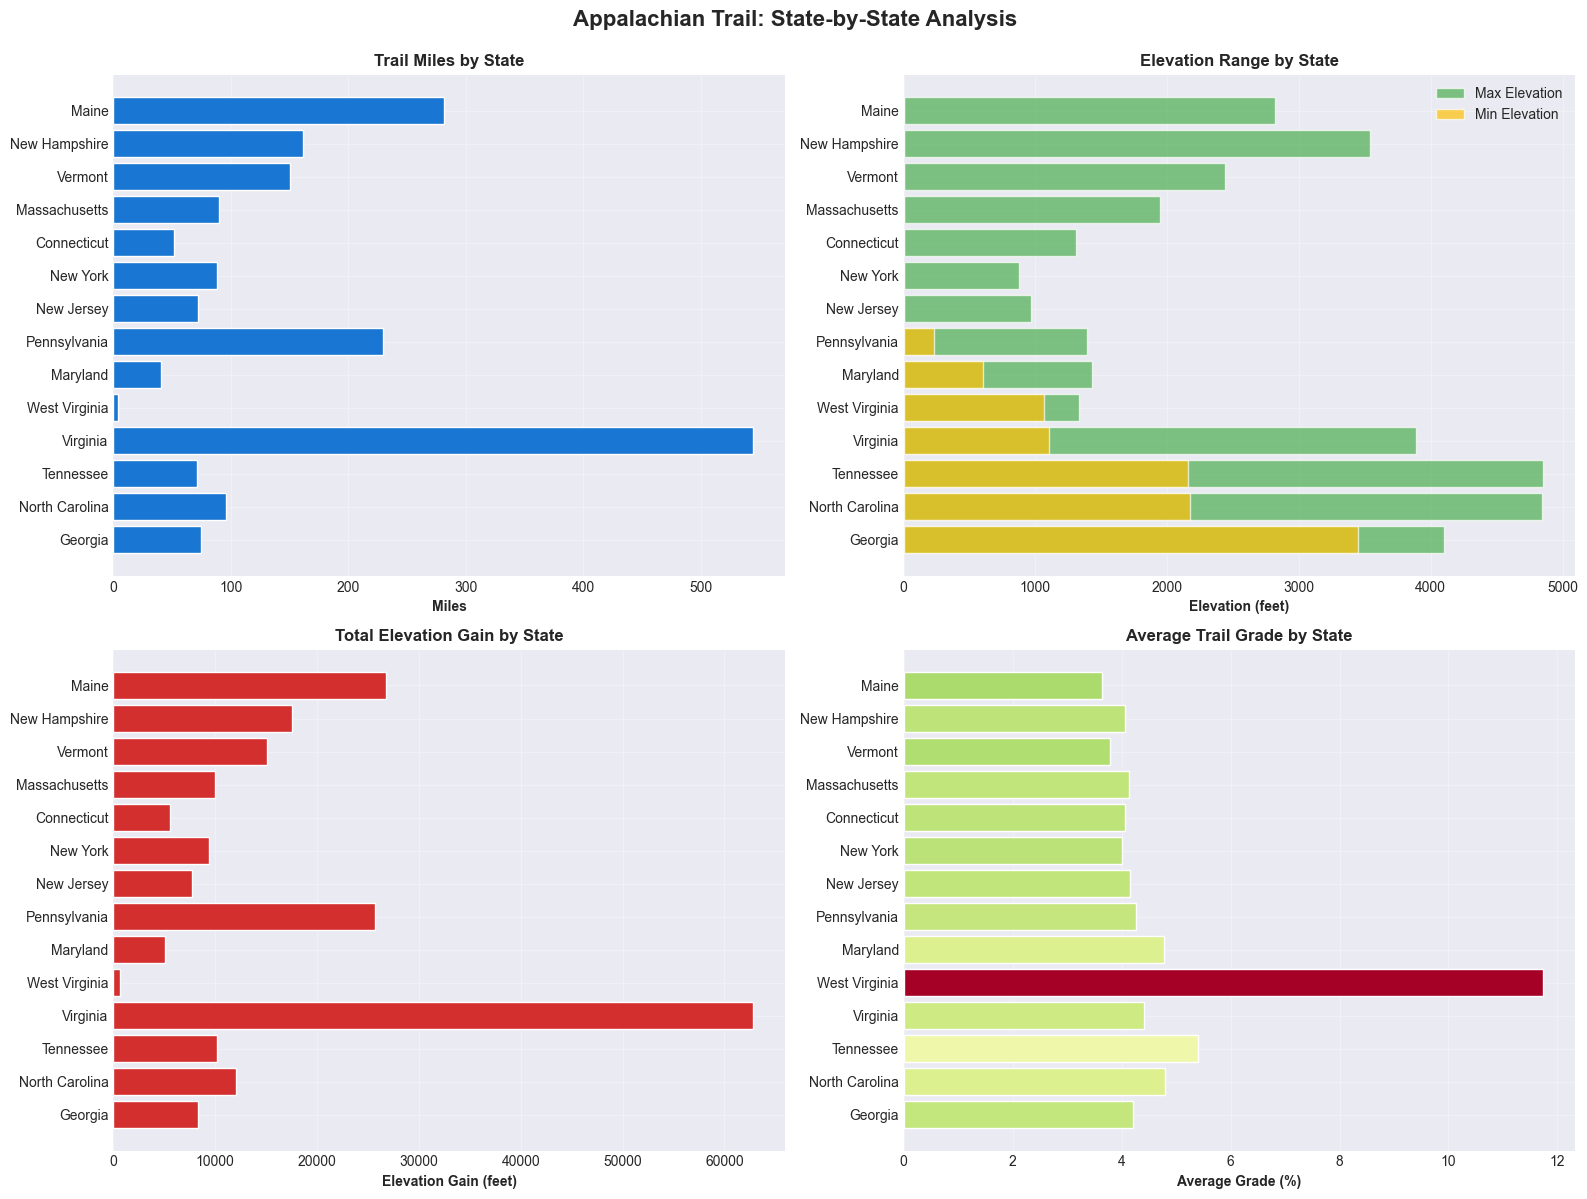

In [18]:
# Visualize state statistics
visualizer.plot_state_statistics(state_stats, save=False)


## 6. Difficulty Analysis


In [19]:
# Analyze difficulty distribution
difficulty_stats = analyzer.analyze_difficulty_distribution()

print("\n⚠️  TRAIL DIFFICULTY DISTRIBUTION\n")
difficulty_stats



⚠️  TRAIL DIFFICULTY DISTRIBUTION



,Miles,Avg Grade %,Max Grade %,Total Elev Change,% of Trail
difficulty,,,,,
Easy,1280.5,0.02,5.00,1041.16,65.5
Moderate,534.7,-0.07,10.00,-2001.49,27.3
Difficult,123.7,0.20,14.96,1286.50,6.3
Very Difficult,14.9,0.24,19.49,192.48,0.8
Extreme,2.1,-29.90,100.61,-3315.02,0.1


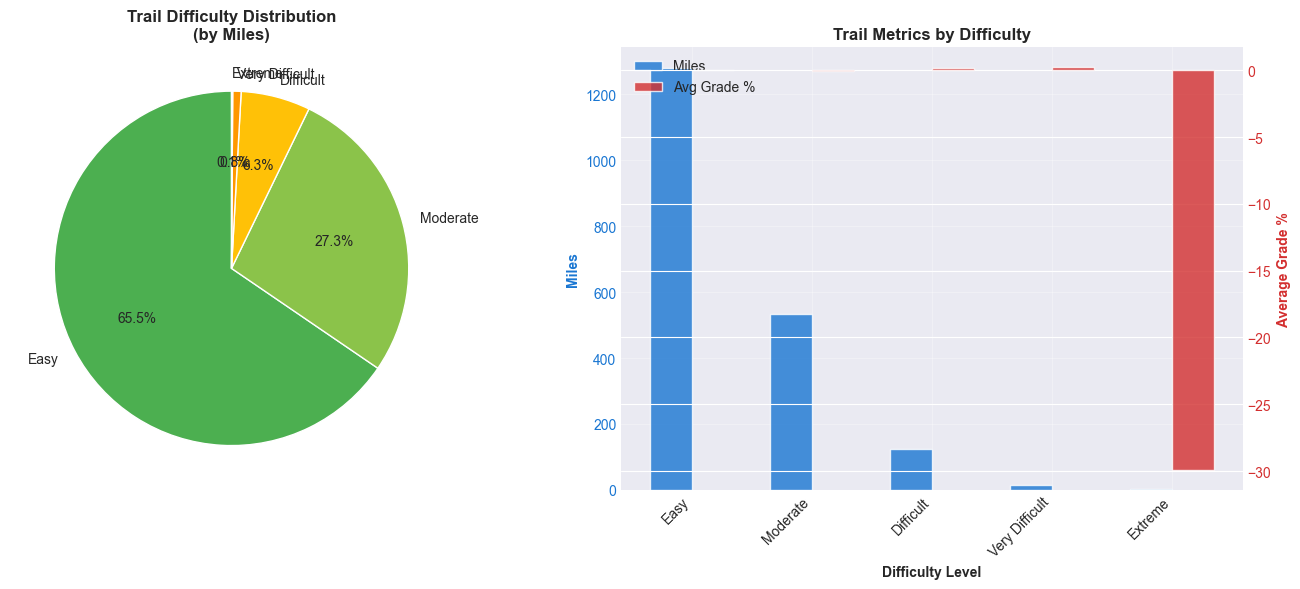

In [20]:
# Visualize difficulty distribution
visualizer.plot_difficulty_distribution(difficulty_stats, save=False)


## 7. Interactive Visualizations


In [21]:
# Create interactive elevation profile
print("Creating interactive elevation profile...")
path = visualizer.create_interactive_elevation_profile(save=True)
print(f"✓ Saved to: {path}")
print("  Open this file in a browser for interactive exploration!")


Creating interactive elevation profile...
✓ Saved to: ./outputs/interactive_elevation.html
  Open this file in a browser for interactive exploration!


In [22]:
# Create interactive map
print("Creating interactive trail map...")
path = visualizer.create_interactive_map(save=True)
print(f"✓ Saved to: {path}")
print("  Open this file in a browser to see the trail route!")


Creating interactive trail map...
✓ Saved to: ./outputs/trail_map.html
  Open this file in a browser to see the trail route!


## 8. Custom Analysis

Feel free to add your own analysis here!


In [23]:
# Your custom analysis here



## 9. Fastest Known Time (FKT) Analysis

The current FKT for the Appalachian Trail is **40 days, 18 hours, and 6 minutes** - an absolutely incredible achievement! Let's analyze what this pace entails.


In [24]:
from fkt_analysis import FKTAnalyzer
from fkt_visualization import FKTVisualizer

# Create FKT analyzer
fkt_analyzer = FKTAnalyzer(df, analyzer)

# Get FKT metrics
fkt_metrics = fkt_analyzer.get_fkt_metrics()

print("=" * 80)
print("🏆 FASTEST KNOWN TIME (FKT) ANALYSIS")
print("=" * 80)

print(f"\n⏱️  RECORD: {fkt_metrics['fkt_record']['formatted']}")
print(f"    ({fkt_metrics['fkt_record']['total_hours']:.1f} total hours)")

pace = fkt_metrics['pace_metrics']
print(f"\n📊 PACE METRICS:")
print(f"    • Miles per day: {pace['miles_per_day']:.1f}")
print(f"    • Overall pace: {pace['avg_mph_overall']:.2f} mph")
print(f"    • Moving pace (est): {pace['avg_mph_moving']:.2f} mph")
print(f"    • Minutes per mile: {pace['minutes_per_mile']:.1f}")
print(f"    • Hiking hours per day: {pace['hiking_hours_per_day']:.1f} hours")

elev = fkt_metrics['elevation_metrics']
print(f"\n⛰️  ELEVATION CHALLENGE:")
print(f"    • Total gain: {elev['total_gain_ft']:,.0f} feet")
print(f"    • Gain per hour: {elev['gain_per_hour_ft']:,.0f} feet")
print(f"    • Gain per day: {elev['gain_per_day_ft']:,.0f} feet")

comp = fkt_metrics['comparison']
print(f"\n🔥 COMPARISON:")
print(f"    • {comp['vs_typical_thru_hike']:.1f}x faster than typical thru-hike")
print(f"    • {comp['vs_fast_thru_hike']:.1f}x faster than fast thru-hike")

print("\nThis represents one of the most impressive athletic achievements")
print("in ultra-endurance sports!")


🏆 FASTEST KNOWN TIME (FKT) ANALYSIS

⏱️  RECORD: 40d 18h 6m
    (978.1 total hours)

📊 PACE METRICS:
    • Miles per day: 48.0
    • Overall pace: 2.00 mph
    • Moving pace (est): 2.39 mph
    • Minutes per mile: 30.0
    • Hiking hours per day: 20.4 hours

⛰️  ELEVATION CHALLENGE:
    • Total gain: 216,693 feet
    • Gain per hour: 222 feet
    • Gain per day: 5,417 feet

🔥 COMPARISON:
    • 3.7x faster than typical thru-hike
    • 2.2x faster than fast thru-hike

This represents one of the most impressive athletic achievements
in ultra-endurance sports!


### Pacing Strategy Comparison


In [25]:
# Compare different pacing strategies
strategies = fkt_analyzer.compare_pacing_strategies()

print("\n🎯 PACING STRATEGIES COMPARISON\n")
strategies



🎯 PACING STRATEGIES COMPARISON



,Strategy,Total Days,Miles/Day,Hours/Day,Moving MPH,Difficulty
0,FKT Record,40.75,48.00,24.45,2.39,Extreme Elite
1,Ultra-Fast Thru-hike,60.00,32.60,16.00,2.33,Very Hard
2,Fast Thru-hike,90.00,21.73,12.00,2.17,Hard
3,Typical Thru-hike,150.00,13.04,10.00,1.63,Moderate
4,Leisurely Thru-hike,180.00,10.87,8.00,1.81,Easy


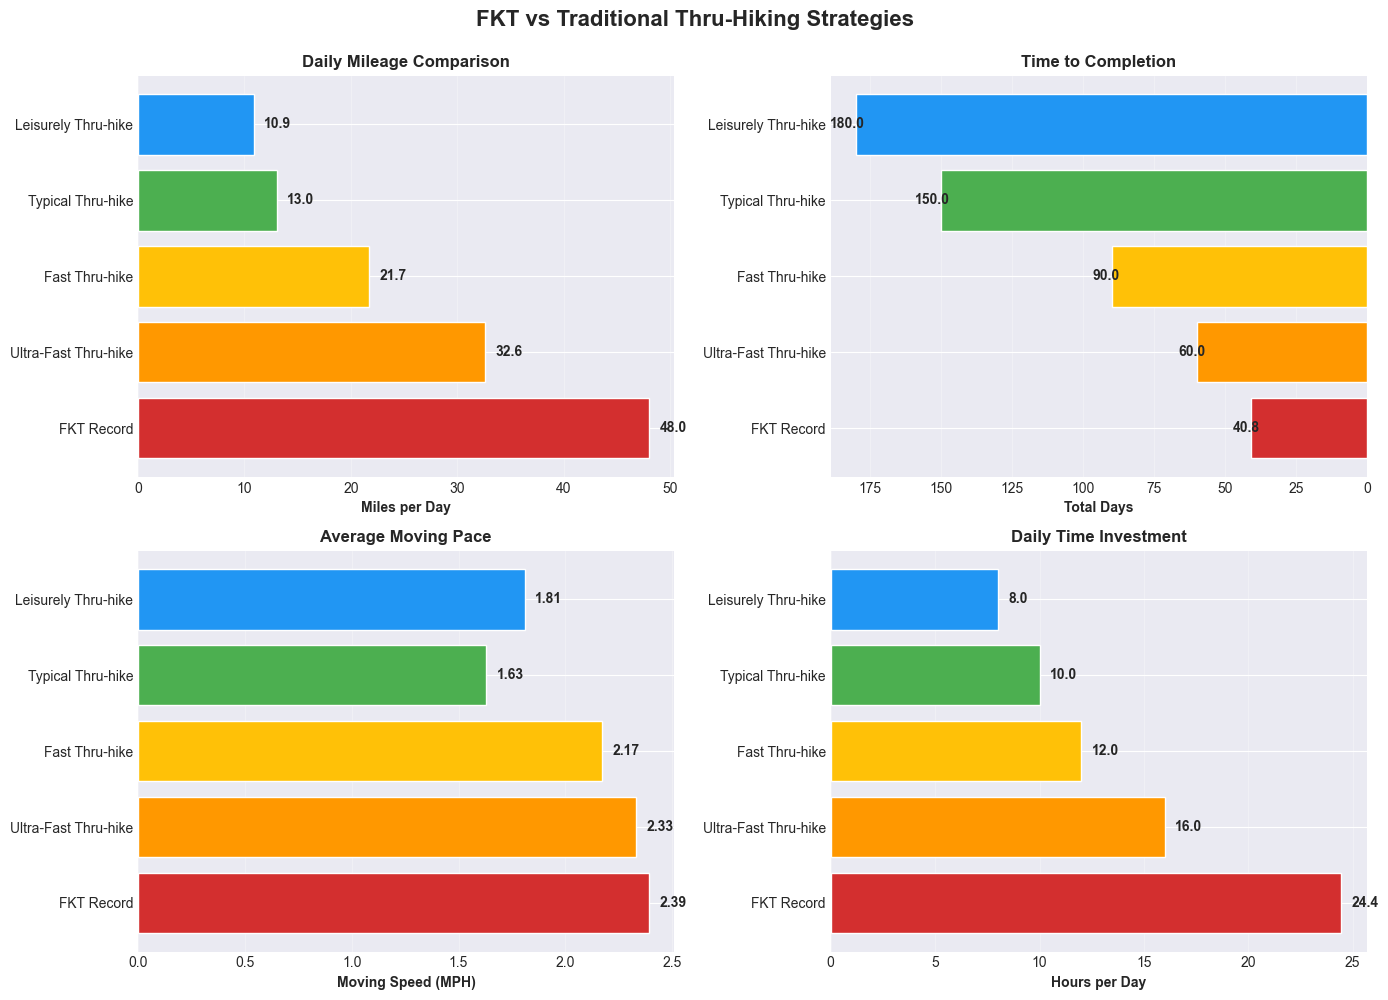

In [26]:
# Visualize pace comparison
fkt_viz = FKTVisualizer(fkt_analyzer, './outputs')
fkt_viz.plot_pace_comparison(save=False)


### Daily Breakdown - Toughest Days


In [27]:
# Calculate daily segments
daily_segments = fkt_analyzer.calculate_daily_segments()

# Find toughest days
toughest_days = fkt_analyzer.identify_toughest_days(daily_segments, n=10)

print("\n🔥 TOP 10 TOUGHEST DAYS (by elevation gain)\n")
toughest_days



🔥 TOP 10 TOUGHEST DAYS (by elevation gain)



,Day,Start Mile,End Mile,Starting State,Ending State,Miles,Elevation Gain,Max Elevation
4,5,192.0,240.0,Tennessee,Tennessee,48.0,6812.0,4831.0
31,32,1487.9,1535.9,Vermont,New Hampshire,48.0,6719.0,3541.0
3,4,144.0,192.0,North Carolina,Tennessee,48.0,6512.0,4854.0
11,12,528.0,576.0,Virginia,Virginia,48.0,6342.0,2504.0
8,9,384.0,432.0,Virginia,Virginia,48.0,6219.0,3391.0
28,29,1343.9,1391.9,Massachusetts,Vermont,48.0,6114.0,2439.0
34,35,1631.9,1679.9,New Hampshire,Maine,48.0,6107.0,3534.0
26,27,1247.9,1295.9,Connecticut,Massachusetts,48.0,6100.0,1937.0
14,15,672.0,720.0,Virginia,Virginia,48.0,6022.0,3372.0
2,3,96.0,144.0,North Carolina,North Carolina,48.0,5987.0,4370.0


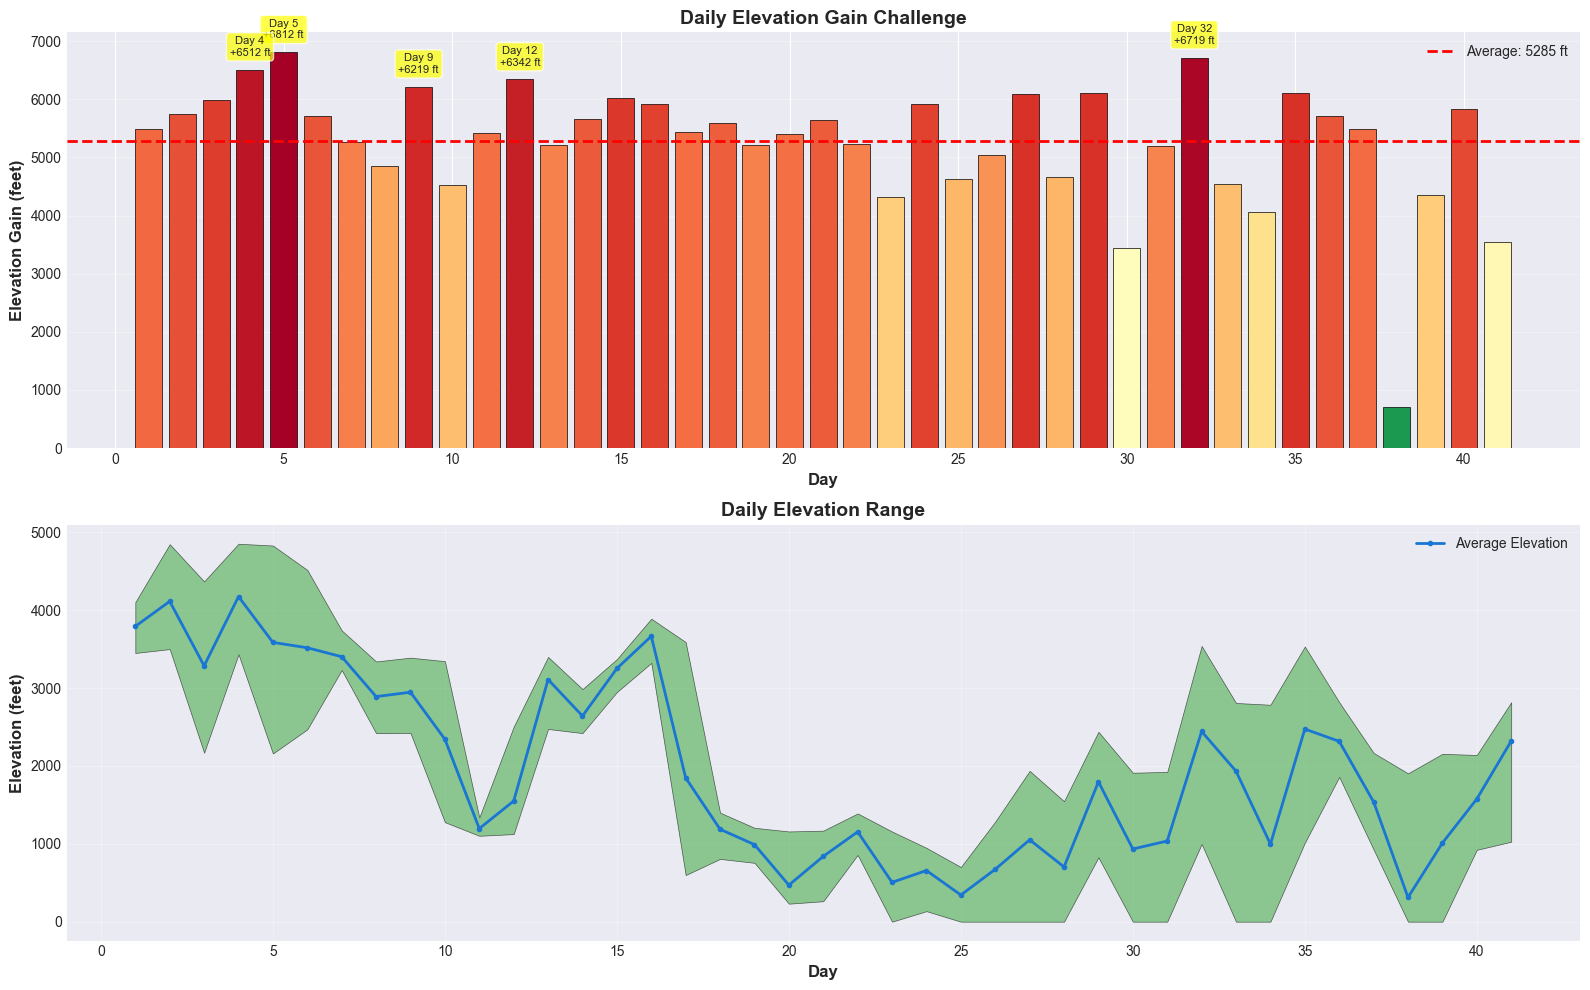

In [28]:
# Visualize daily elevation challenge
fkt_viz.plot_daily_elevation_profile(save=False)


### Required Pace by Terrain


In [29]:
# Analyze pace requirements by terrain
terrain_pace = fkt_analyzer.calculate_required_pace_by_terrain()

print("\n⚡ REQUIRED PACE BY TERRAIN TYPE\n")
terrain_pace



⚡ REQUIRED PACE BY TERRAIN TYPE



,Terrain,Miles,% of Trail,Avg Grade %,Required Pace MPH,Equivalent Flat MPH,Time Hours
0,Easy,1280.5,65.5,2.09,2.39,2.67,535.8
1,Moderate,534.7,27.3,7.05,2.39,3.69,223.7
2,Difficult,123.7,6.3,11.77,2.39,5.81,51.8
3,Very Difficult,14.9,0.8,16.39,2.39,7.97,6.2
4,Extreme,2.1,0.1,55.71,2.39,7.97,0.9


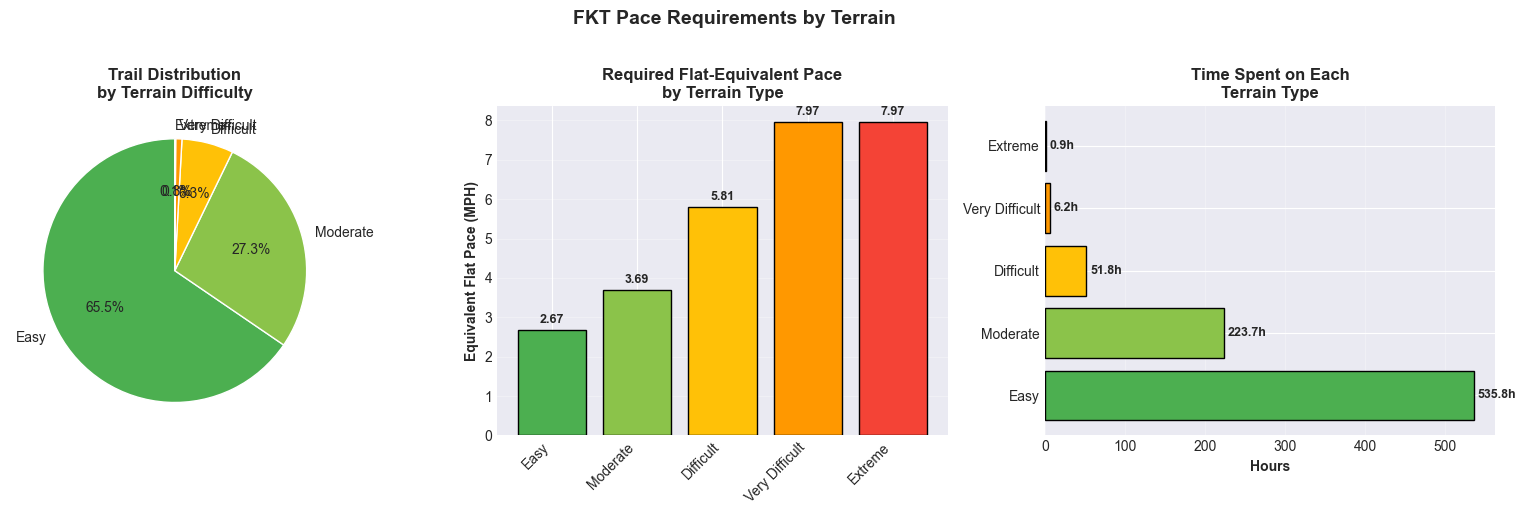

In [30]:
# Visualize terrain pace requirements
fkt_viz.plot_required_pace_by_terrain(save=False)


In [ ]:
# Your custom analysis here

